Data set from Kaggle：https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

This dataset contains about 10 years of daily weather observations from many locations across Australia.
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.

In [96]:
import pandas as pd


In [98]:
#read the data
weather = pd.read_csv('weatherAUS.csv')
weather.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [100]:
# look at null data
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [102]:
weather_new = weather.iloc[:,0:5]
weather_new.head()


,Date,Location,MinTemp,MaxTemp,Rainfall
0,2008-12-01,Albury,13.4,22.9,0.6
1,2008-12-02,Albury,7.4,25.1,0.0
2,2008-12-03,Albury,12.9,25.7,0.0
3,2008-12-04,Albury,9.2,28.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0


In [104]:
weather_new.dtypes

Date         object
Location     object
MinTemp     float64
MaxTemp     float64
Rainfall    float64
dtype: object

In [106]:
weather_new= weather_new.dropna(axis = 'index')

In [108]:
#we find some station only have the 5 year weather record. so we remove these station
weather_new.groupby('Location').count()['Date']
five_years_weather = weather_new.groupby('Location').count()['Date'][weather_new.groupby('Location').count()['Date']<2000]

In [110]:
five_years_weather.index
indexStation = weather_new[ (weather_new['Location'] == 'Katherine') | (weather_new['Location'] == 'Nhil') | (weather_new['Location'] == 'Uluru') ].index
weather_new = weather_new.drop(indexStation)
weather_new.groupby('Location').count()['Date']


Location
Adelaide            3089
Albany              2928
Albury              3002
AliceSprings        3029
BadgerysCreek       2919
Ballarat            3027
Bendigo             3030
Brisbane            3145
Cairns              2987
Canberra            3411
Cobar               2984
CoffsHarbour        2944
Dartmoor            2937
Darwin              3191
GoldCoast           2975
Hobart              3187
Launceston          3022
Melbourne           2434
MelbourneAirport    3009
Mildura             3007
Moree               2852
MountGambier        3027
MountGinini         2857
Newcastle           2565
NorahHead           2917
NorfolkIsland       2962
Nuriootpa           2984
PearceRAAF          2731
Penrith             2953
Perth               3192
PerthAirport        3009
Portland            2986
Richmond            2939
Sale                2998
SalmonGums          2943
Sydney              3333
SydneyAirport       3005
Townsville          3031
Tuggeranong         2994
WaggaWagga      

In [112]:
#calcualte the daily average temperature
weather_new['Daily_Temp'] = (weather_new['MinTemp']+weather_new['MaxTemp'])/2

In [114]:
#change the type of Date
weather_new['Date']= pd.to_datetime(weather_new['Date'])

In [116]:
weather_new.dtypes

Date          datetime64[ns]
Location              object
MinTemp              float64
MaxTemp              float64
Rainfall             float64
Daily_Temp           float64
dtype: object

In [134]:
#separate Date into year, month, day
weather_new['Year'] = weather_new['Date'].dt.year
weather_new['Month'] = weather_new['Date'].dt.month
weather_new['Day'] = weather_new['Date'].dt.day
weather_new['Month_Day'] = weather_new['Date'].dt.strftime('%m-%d')

In [129]:
#Look at data
weather_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Daily_Temp,Year,Month,Day,day
0,2008-12-01,Albury,13.4,22.9,0.6,18.15,2008,12,1,12-01
1,2008-12-02,Albury,7.4,25.1,0.0,16.25,2008,12,2,12-02
2,2008-12-03,Albury,12.9,25.7,0.0,19.30,2008,12,3,12-03
3,2008-12-04,Albury,9.2,28.0,0.0,18.60,2008,12,4,12-04
4,2008-12-05,Albury,17.5,32.3,1.0,24.90,2008,12,5,12-05


In [130]:
weather_new.describe()

,MinTemp,MaxTemp,Rainfall,Daily_Temp,Year,Month,Day
count,136750.000000,136750.000000,136750.000000,136750.000000,136750.000000,136750.000000,136750.000000
mean,12.104940,23.030143,2.378590,17.567542,2012.688607,6.405243,15.720395
std,6.343547,6.986982,8.465985,6.204641,2.540764,3.428091,8.799941
min,-8.500000,-4.800000,0.000000,-6.150000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,12.950000,2010.000000,3.000000,8.000000
50%,11.900000,22.500000,0.000000,17.250000,2013.000000,6.000000,16.000000
75%,16.700000,27.900000,0.800000,22.100000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,38.800000,2017.000000,12.000000,31.000000


In [131]:
#how many station
weather_new.nunique()

Date          3436
Location        46
MinTemp        387
MaxTemp        503
Rainfall       672
Daily_Temp    1491
Year            11
Month           12
Day             31
day            366
dtype: int64

In [133]:
#calculate the average rainfall for each station
weather_average_rainfall = weather_new.groupby(['Location', 'Year']).sum()['Rainfall']
weather_average_rainfall = weather_average_rainfall.groupby(['Location']).mean()
weather_average_rainfall = weather_average_rainfall.reset_index()
weather_average_rainfall.head()



D:\temp\ipykernel_23420\2270775364.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_average_rainfall = weather_new.groupby(['Location', 'Year']).sum()['Rainfall']


,Location,Rainfall
0,Adelaide,483.880000
1,Albany,665.520000
2,Albury,576.320000
3,AliceSprings,267.180000
4,BadgerysCreek,711.555556
5,Ballarat,526.380000
6,Bendigo,491.300000
7,Brisbane,990.720000
8,Cairns,1715.720000
9,Canberra,541.200000


In [144]:
#calculate the monthly average temperature for each station
weather_average_temp = weather_new.groupby(['Location', 'Month_Day']).mean()['Daily_Temp']
weather_average_temp = weather_average_temp.reset_index()
weather_average_temp = weather_average_temp[weather_average_temp['Month_Day'] != '02-29']
weather_average_temp['Month_Day'].head(60)


D:\temp\ipykernel_23420\764243424.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_average_temp = weather_new.groupby(['Location', 'Month_Day']).mean()['Daily_Temp']


0     01-01
1     01-02
2     01-03
3     01-04
4     01-05
5     01-06
6     01-07
7     01-08
8     01-09
9     01-10
10    01-11
11    01-12
12    01-13
13    01-14
14    01-15
15    01-16
16    01-17
17    01-18
18    01-19
19    01-20
20    01-21
21    01-22
22    01-23
23    01-24
24    01-25
25    01-26
26    01-27
27    01-28
28    01-29
29    01-30
30    01-31
31    02-01
32    02-02
33    02-03
34    02-04
35    02-05
36    02-06
37    02-07
38    02-08
39    02-09
40    02-10
41    02-11
42    02-12
43    02-13
44    02-14
45    02-15
46    02-16
47    02-17
48    02-18
49    02-19
50    02-20
51    02-21
52    02-22
53    02-23
54    02-24
55    02-25
56    02-26
57    02-27
58    02-28
60    03-01
Name: Month_Day, dtype: object

In [145]:
#write data into two files
weather_average_rainfall.to_csv('average_rainfall.csv', index=None)
weather_average_temp.to_csv('average_temp.csv', index=None)


In [146]:
weather_average_temp_pivot = weather_average_temp.pivot(index= 'Month_Day',columns = "Location")

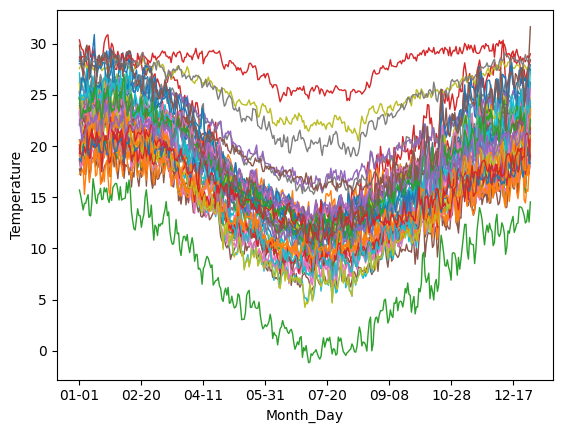

In [148]:
weather_average_temp_pivot.plot.line(ylabel = 'Temperature', legend = False, lw=1)
import matplotlib.pyplot as plt
plt.savefig('temperature.png')

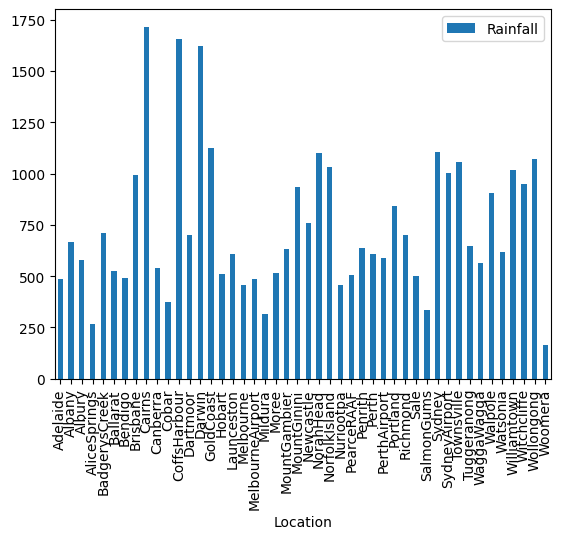

In [92]:
weather_average_rainfall.plot.bar(x = 'Location', y = 'Rainfall')
plt.savefig('rainfall.png')